# Simple 1D statistical analysis

The purpose of this exercise is to get acquainted with simple methods for working with, and sampling
from, 1D (both parametric and non-parametric) probability distributions.

In the following $f(x)$ is a 1D probability density and $F(x)$ the corresponding 1D cumulative probability
density function. $F^{−1}(x)$ is the inverse cumulative probability density function.

You need function to compute the probability density function value ([scipy.stats.norm.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)), the cumulative distribution function ([scipy.stats.norm.cdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)) and inverse cumulative distribution ([scipy.stats.norm.ppf](scipy.stats.norm.ppf)) for a 1D normal distribution.


In [1]:
import matplotlib.pyplot  as plt
import numpy              as np
import scipy


## 1D Gaussian Statistics

The normal distribution (also referred to as the Gaussian distribution) is the most widely used parametric
probability distribution in earth and space science. It is used for many purposes., such as e.g.
characterize noise in data, and variability of model parameters.

In the following $N(m, v)$ refers to a 1D Gaussian probability density function, with mean $m$ and
variance $v$.
To solve this exercise you can either make your own Matlab/Python functions or make use of the
built-in functions. In Matlab these functions could be

Consider two probability distributions, $f^1(x)$ and  $f^2(x)$ that represent two independent experts opinion
about the value of $x$. Both experts assume that their information can be described by a Gaussian distribution.
However, they assume different properties of the Gaussian distribution as given by:

Expert 1:
$$f^1(x) = N(13, 1) $$
Expert 2:
$$f^2(x) = N(8, 3) $$


Let $f^{12}(x)$  denote the combined state of information given by the two experts, which can also be
described by a 
$$
f^{12}(x) = k f^1(x) f^2(x),
$$
where k is a normalization constant.

### Ex1: Compute and plot $f^1(x)$ and $f^2(x)$ for $x = [0, 0.1, 0.2, . . . , 18]$, and plot the two probability distributions on the same figure. 
How would you describe the consistency of the two experts?

In [2]:
# Set some variables
m1      = 13.   # Mean of distribution 1
var1    = 1.    # Variance of distribution 1

m2      = 8.    # Mean of distribution 1
var2    = 3.    # Variance of distribution 1

dx      = 0.01 
x = np.arange(0,18+dx/2,dx)


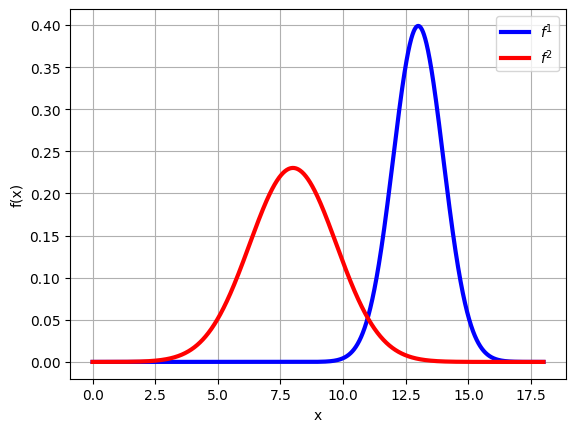

In [3]:
# PDFs for f1 and f2
f1      = scipy.stats.norm.pdf(x,m1,np.sqrt(var1))
f2      = scipy.stats.norm.pdf(x,m2,np.sqrt(var2))
    
# figure
plt.figure(1);
plt.plot(x,f1,'b-',linewidth=3,label='$f^1$')
plt.plot(x,f2,'r-',linewidth=3,label='$f^2$')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

### Ex2. Compute and plot $f^1(x)$, $f^2(x)$, and $f^{12}(x)$ for $x = [0, 0.1, 0.2, . . . , 18]$, and plot the two probability distributions on the same figure. 


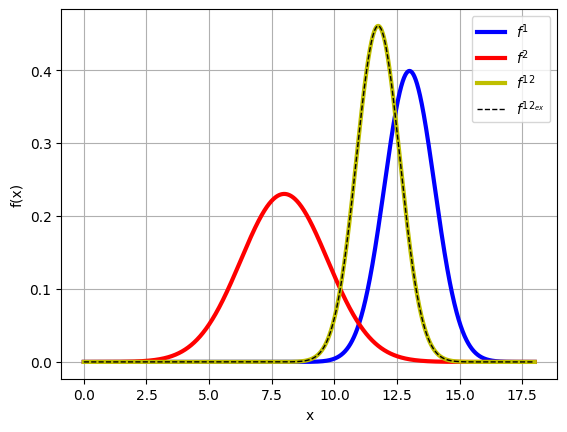

In [4]:
# PDFs for f1 and f2
f1      = scipy.stats.norm.pdf(x,m1,np.sqrt(var1))
f2      = scipy.stats.norm.pdf(x,m2,np.sqrt(var2))

# compute f12 'manually'
f12     = f1*f2
f12     = (f12/sum(f12))/dx # normalize 

# compute f12 analytical as the product of two gaussian pdfs
m12     = (m1*var2+m2*var1)/(var1+var2)
var12   = ((var1*var2)/(var1+var2))
f12_ex  = scipy.stats.norm.pdf(x,m12,np.sqrt(var12))

# figure
plt.figure(1);
plt.plot(x,f1,'b-',linewidth=3,label='$f^1$')
plt.plot(x,f2,'r-',linewidth=3,label='$f^2$')
plt.plot(x,f12,'y-',linewidth=3,label='$f^{12}$')
plt.plot(x,f12_ex,'k--',linewidth=1,label='$f^{12_{ex}}$')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

### Ex3. Compute $p = f^{12}(x = 13)$. 
Does $p$ represent a probability ?


In [5]:
pdf_val13   = f12[x==13]
pdf_val13_ex = scipy.stats.norm.pdf(13,m12,np.sqrt(var12))

print('f*(x = 13) = %g' % pdf_val13[0])
print('f*(x = 13) = %g (analytical)'% pdf_val13_ex)

# The value of p does not represent a probability

f*(x = 13) = 0.162551
f*(x = 13) = 0.162551 (analytical)


### Ex4. Compute the two numbers $f^{12}(x = 13)$, and $f^{12}(x = 8)$. 
What information can be extracted from these two probability density values ?

In [6]:
pdf_val13   = f12[x==13]
pdf_val13_ex = scipy.stats.norm.pdf(13,m12,np.sqrt(var12))

pdf_val8    = f12[x==8]
rel_prob    = pdf_val13/pdf_val8

print('f*(x = 13) = %g'%pdf_val13[0])
print('f*(x =  8) = %g'%pdf_val8[0])
print('x=13 is %g times more likely than x=8 as an outcome of f*(x)'%rel_prob[0])
print('\n')

f*(x = 13) = 0.162551
f*(x =  8) = 3.90723e-05
x=13 is 4160.26 times more likely than x=8 as an outcome of f*(x)




##### Ex4. Compute and plot $F^1(x)$, $F^2(x)$, and $F^{12}(x)$ $x = [0, 0.1, 0.2, . . . 18]$, and plot all cumulative probability density distributions on the same figure.

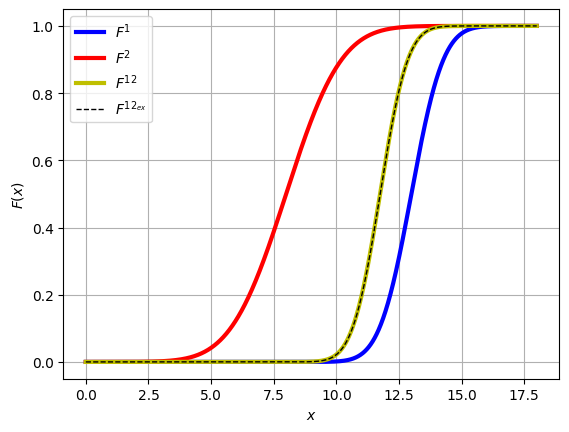

In [7]:

# Compute F using numerical integration
F1      = np.cumsum(f1)*dx
F2      = np.cumsum(f2)*dx
F12     = np.cumsum(f12)*dx

# Compute F directly
F1_ex  = scipy.stats.norm.cdf(x,m1,np.sqrt(var1))
F2_ex  = scipy.stats.norm.cdf(x,m2,np.sqrt(var2))
F12_ex  = scipy.stats.norm.cdf(x,m12,np.sqrt(var12))

plt.figure(2)
plt.plot(x,F1,'b-',linewidth=3,label='$F^1$')
plt.plot(x,F2,'r-',linewidth=3,label='$F^2$')
plt.plot(x,F12,'y-',linewidth=3,label='$F^{12}$')
plt.plot(x,F12_ex,'k--',linewidth=1,label='$F^{12_{ex}}$')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.legend()

### Ex 6. Compute the centered 95% confidence intervals for $f^1(x)$, $f^2(x)$, and $f^{12}(x)$, i.e. $[F^−1(0.025),F^−1(0.975)]$.


In [8]:
print('Confidence Intervals')
print('f_1,   95%% confidence interval [%5.3f,%5.3f]' %(scipy.interpolate.interp1d(F1,x)(0.025),scipy.interpolate.interp1d(F1,x)(0.975)))
print('f_2,   95%% confidence interval [ %5.3f,%5.3f]'%(scipy.interpolate.interp1d(F2,x)(0.025),scipy.interpolate.interp1d(F2,x)(0.975)))
print('f_12,  95%% confidence interval [%5.3f,%5.3f]' %(scipy.interpolate.interp1d(F12,x)(0.025),scipy.interpolate.interp1d(F12,x)(0.975)))
print('\n')
print('Confidence Intervals (Analytic)')
print('f_1,   95%% confidence interval [%5.3f,%5.3f]'%(scipy.stats.norm.ppf(0.025,m1,np.sqrt(var1)),scipy.stats.norm.ppf(0.975,m1,np.sqrt(var1))))
print('f_2,   95%% confidence interval [ %5.3f,%5.3f]'%(scipy.stats.norm.ppf(0.025,m2,np.sqrt(var2)),scipy.stats.norm.ppf(0.975,m2,np.sqrt(var2))))
print('f_12,  95%% confidence interval [%5.3f,%5.3f]'%(scipy.stats.norm.ppf(0.025,m12,np.sqrt(var12)),scipy.stats.norm.ppf(0.975,m12,np.sqrt(var12))))
print('\n')

Confidence Intervals
f_1,   95% confidence interval [11.035,14.955]
f_2,   95% confidence interval [ 4.600,11.390]
f_12,  95% confidence interval [10.048,13.442]


Confidence Intervals (Analytic)
f_1,   95% confidence interval [11.040,14.960]
f_2,   95% confidence interval [ 4.605,11.395]
f_12,  95% confidence interval [10.053,13.447]




### Ex 7.Compute $P^1(8 < x< 10)$, $P^2(8 < x< 10)$, and $P^{12}(8 < x< 10)$, 


In [9]:
# f^1
F1_10 = scipy.interpolate.interp1d(x,F1)(10)
F1_8 = scipy.interpolate.interp1d(x,F1)(8)
print(' P1[ 8<x<10 ] =  F1(10)- F1(8) = % 3.2f' % (F1_10-F1_8))

# f^2
F2_10 = scipy.interpolate.interp1d(x,F2)(10)
F2_8 = scipy.interpolate.interp1d(x,F2)(8)
print(' P2[ 8<x<10 ] =  F2(10)- F2(8) = % 3.2f' % (F2_10-F2_8))

# f^*
F12_10 = scipy.interpolate.interp1d(x,F12)(10)
F12_8 = scipy.interpolate.interp1d(x,F12)(8)
print('P12[ 8<x<10 ] = F12(10)-F12(8) = % 3.2f' % (F12_10-F12_8))


 P1[ 8<x<10 ] =  F1(10)- F1(8) =  0.00
 P2[ 8<x<10 ] =  F2(10)- F2(8) =  0.38
P12[ 8<x<10 ] = F12(10)-F12(8) =  0.02
